In [1]:
# Import matplotlib before seaborn
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools  # for color palette cycling
import os
import re
import pandas as pd
import seaborn as sns
import sys
from cycler import cycler
import seaborn as sns
%matplotlib inline

In [2]:
import numpy as np

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
sys.path.append('/work/rnaseq/pcor_new')
import plot_histograms_by_edge_category

/work/software/anaconda3/envs/py3/lib/python3.5/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Notes: 

* This notebook deprecates `rnaseq/pcor_new/GeneNet/170412_look_at_GeneNet_network.ipynb`, which was moved to `rnaseq/pcor_new/old` upon this notebook's first commit. 
* I don't actually use the Cytoscape export code after the `assert False` code below.  But maybe someone else will find it useful. 

In [5]:
EDGE_DIR = 'cutoff_0.01'

In [6]:
plot_dir = '170425_explore_' + EDGE_DIR
print(plot_dir)
if not os.path.exists(plot_dir):
    os.mkdir(plot_dir)

170425_explore_cutoff_0.01


In [7]:
! realpath $plot_dir

/work/rnaseq/pcor_new/GeneNet/170425_explore_cutoff_0.01


In [8]:
import glob

search_path = os.path.join(EDGE_DIR, 'results/data/*top_*_edges.tsv')
EDGE_FILE = glob.glob(search_path)[0]
print(EDGE_FILE)

cutoff_0.01/results/data/input_to_R--no_features_dropped--top_1e+06_edges.tsv


In [9]:
edges = plot_histograms_by_edge_category.load_edges(EDGE_FILE)

edges.head()

,node2_locus,node1_locus,node2,node1,pcor,pval,qval,prob,log.spvar,pval.dir,qval.dir,prob.dir,directions,product_1,product_2
1,1_00451,1_00266,2,1,0.002622,8.347989e-12,7.958762e-11,1.000000,0.007486,0.581858,0.710264,2.475797e-14,undirected,Vitamin B12 transporter BtuB,DNA-directed RNA polymerase subunit beta'
2,1_00466,1_00266,3,1,-0.003618,2.220446e-16,2.705115e-15,1.000000,0.002628,0.846709,0.781050,2.475797e-14,undirected,Vitamin B12 transporter BtuB,Iron deficiency-induced protein A precursor
3,1_00499,1_00466,4,3,-0.002055,8.513387e-08,6.011404e-07,0.999985,0.003758,0.782226,0.767203,2.475797e-14,undirected,Iron deficiency-induced protein A precursor,L-2%2C4-diaminobutyrate decarboxylase
4,1_00499,1_00266,4,1,0.003241,2.220446e-16,2.705115e-15,1.000000,0.006386,0.638542,0.729015,2.475797e-14,undirected,Vitamin B12 transporter BtuB,L-2%2C4-diaminobutyrate decarboxylase
5,1_00912,1_00451,6,2,0.003346,2.220446e-16,2.705115e-15,1.000000,0.000426,0.975016,0.804222,2.475797e-14,undirected,DNA-directed RNA polymerase subunit beta',hypothetical protein


In [10]:
NUM_EDGES = edges.shape[0]
print('number of edges: {:.0e}'.format(NUM_EDGES))

number of edges: 1e+06


edges = pd.read_csv(EDGE_FILE, sep='\t')
NUM_EDGES = edges.shape[0]
print('number of edges: {:.0e}'.format(NUM_EDGES))
edges.head()

In [11]:
# how many edges have 'hypothetical protein' in them? 
frac_hypothetical = \
    edges[edges['product_1'].str.contains('hypothetical protein') | 
          edges['product_2'].str.contains('hypothetical protein')].shape[0]/edges.shape[0]
print('fraction of edges that have "hypothetical protein": {}.  (for {} edges)'.format(
    frac_hypothetical, NUM_EDGES))

fraction of edges that have "hypothetical protein": 0.545207.  (for 1000000 edges)


170425_explore_cutoff_0.01/pcor_hist--1e+06_edges.pdf


/work/software/anaconda3/envs/py3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


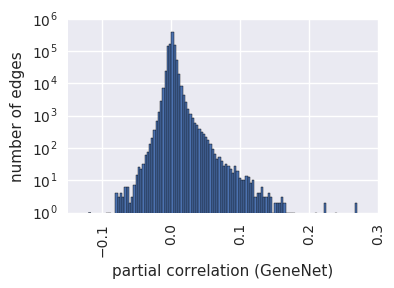

In [12]:
fig, ax = plt.subplots(1,1, figsize=(4, 2.5))
edges['pcor'].hist(bins=120, ax=ax)
ax.set_xlabel('partial correlation (GeneNet)')
ax.set_ylabel('number of edges')
plt.xticks(rotation=90)
if NUM_EDGES > 1e6*0.5:
    ax.set_yscale('log')
fname = os.path.join(plot_dir, 'pcor_hist--{:.0e}_edges.pdf'.format(NUM_EDGES))
print(fname)
fig.savefig(fname, bbox_inches='tight')

In [13]:
edges[edges['pcor'] > 0.2]

,node2_locus,node1_locus,node2,node1,pcor,pval,qval,prob,log.spvar,pval.dir,qval.dir,prob.dir,directions,product_1,product_2
98203,1_91925,1_91924,1248,1247,0.238674,2.220446e-16,2.705115e-15,1.0,-0.191140,2.220446e-16,5.735520e-15,1.000000e+00,2to1,hypothetical protein,hypothetical protein
278678,2_66262,2_136667,2054,1541,0.223293,2.220446e-16,2.705115e-15,1.0,-0.048481,3.622060e-04,2.358016e-03,9.815124e-01,2to1,hypothetical protein,hypothetical protein
279684,2_66263,2_66262,2055,2054,0.270545,2.220446e-16,2.705115e-15,1.0,0.078263,8.565390e-09,1.193686e-07,9.999976e-01,1to2,hypothetical protein,hypothetical protein
415926,3_147904,1_185205,2505,621,0.222781,2.220446e-16,2.705115e-15,1.0,-0.152769,2.220446e-16,5.735520e-15,1.000000e+00,2to1,hypothetical protein,Bacteriophage coat protein B
476014,3_36653,3_131225,2672,2446,0.209196,2.220446e-16,2.705115e-15,1.0,0.033898,1.264991e-02,5.059853e-02,2.475797e-14,undirected,EVE domain protein,PEP-CTERM motif protein
805472,4_90575,2_95136,3427,2256,0.268319,2.220446e-16,2.705115e-15,1.0,-0.011693,3.897372e-01,6.214984e-01,2.475797e-14,undirected,hypothetical protein,Cell wall-associated hydrolase


170425_explore_cutoff_0.01/pcor_hist--1e+06_edges--hypothetical_proteins_only.pdf


/work/software/anaconda3/envs/py3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


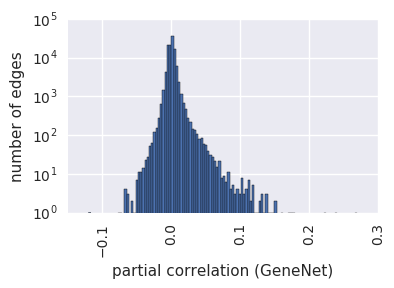

In [14]:
hypo = edges[edges['product_1'].str.contains('hypothetical protein') & 
                 edges['product_2'].str.contains('hypothetical protein')]
hypo.shape

fig, ax = plt.subplots(1,1, figsize=(4, 2.5))
hypo['pcor'].hist(bins=120, ax=ax)
ax.set_xlabel('partial correlation (GeneNet)')
ax.set_ylabel('number of edges')
plt.xticks(rotation=90)
if NUM_EDGES > 1e6*0.5:
    ax.set_yscale('log')
    
fname = os.path.join(
    plot_dir, 
    'pcor_hist--{:.0e}_edges--hypothetical_proteins_only.pdf'.format(NUM_EDGES))
print(fname)
fig.savefig(fname, bbox_inches='tight')

170425_explore_cutoff_0.01/pcor_hist--1e+06_edges--hypothetical_proteins_omitted.pdf


/work/software/anaconda3/envs/py3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


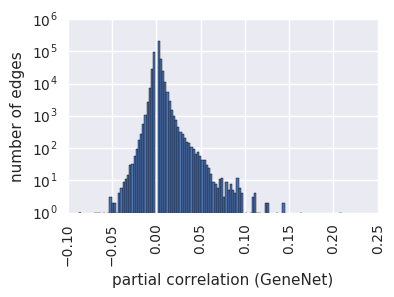

In [15]:
non_hypo = edges[~ edges['product_1'].str.contains('hypothetical protein') & 
                 ~ edges['product_2'].str.contains('hypothetical protein')]
non_hypo.shape

fig, ax = plt.subplots(1,1, figsize=(4, 2.5))
non_hypo['pcor'].hist(bins=120, ax=ax)
ax.set_xlabel('partial correlation (GeneNet)')
ax.set_ylabel('number of edges')
plt.xticks(rotation=90)
if NUM_EDGES > 1e6*0.5:
    ax.set_yscale('log')
    
fname = os.path.join(
    plot_dir,
    'pcor_hist--{:.0e}_edges--hypothetical_proteins_omitted.pdf'.format(NUM_EDGES))
print(fname)
fig.savefig(fname, bbox_inches='tight')

In [16]:
mmo_edges = plot_histograms_by_edge_category.get_mmo_edges(edges)

number of edges selected: 324


In [17]:
#4_110210 4_110211, 4_110210 4_110211,  4_79604 4_79605, 4_79604 4_79606, 4_79605 4_79606, 5_107303 5_107304, 5_161996 5_161997

In [18]:
m = re.search('[0-9]+_([0-9]+)', '5_151185')
print(m.groups())
if m:
    found = m.group(0)
    print(found)

('151185',)
5_151185


In [19]:
plot_histograms_by_edge_category.extract_second_num('5_151185')

151185

In [20]:
plot_histograms_by_edge_category.round_to_nearest_step(0.021, .02)

0.02

In [21]:
plot_histograms_by_edge_category.make_bin_edges(-0.02079, 0.143, 0.02)

lower: -0.02, upper: 0.14


array([-0.02,  0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12])

In [22]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

1_141442 1_141443 0.00574108287657911
    Particulate methane monooxygenase alpha subunit precursor | Particulate methane monooxygenase alpha subunit precursor
1_66816 1_66817 0.010256384851174999
    Ammonia monooxygenase/methane monooxygenase%2C subunit C | Particulate methane monooxygenase beta subunit
1_66817 1_66818 0.0116448639897927
    Particulate methane monooxygenase beta subunit | Particulate methane monooxygenase alpha subunit precursor
2_125461 2_125462 0.0093148809669378
    Ammonia monooxygenase/methane monooxygenase%2C subunit C | Particulate methane monooxygenase beta subunit
2_17600 2_17601 0.00471664358592838
    Particulate methane monooxygenase beta subunit | Ammonia monooxygenase/methane monooxygenase%2C subunit C
2_46326 2_46327 0.0974562827627392
    Particulate methane monooxygenase alpha subunit precursor | Particulate methane monooxygenase beta subunit
3_138947 3_138948 0.0838093305616077
    Particulate methane monooxygenase alpha subunit precursor | Particu

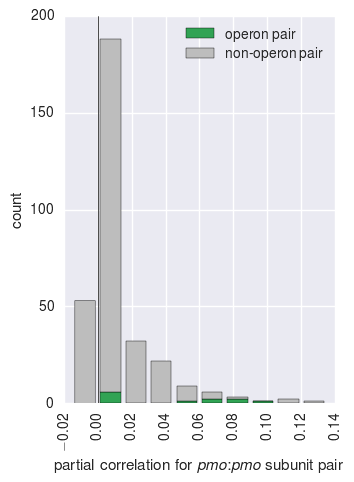

In [23]:
linked, unlinked = plot_histograms_by_edge_category.separate_out_linked_and_not_linked_rows(
    edge_df=mmo_edges, distance_allowed=1)

bin_label = r'partial correlation for \textit{pmo}:\textit{pmo} subunit pair'
#bin_label = 'partial correlation for pmo:pmo subunit pair'
        
fig = plot_histograms_by_edge_category.plot_linked_and_unlinked(
    linked, unlinked, bin_label = bin_label)

fname = os.path.join(plot_dir, 
    '170425_pmo_subunit_pairs_have_higher_pcor--GeneNet--{:.0e}_edges.pdf'.format(NUM_EDGES))
print(fname)
fig.savefig(fname, bbox_inches='tight')
fname = os.path.join(plot_dir, 
    '170425_pmo_subunit_pairs_have_higher_pcor--GeneNet--{:.0e}_edges.png'.format(NUM_EDGES))
print(fname)
fig.savefig(fname, bbox_inches='tight')

-0.020793513743499 0.142841543675792
lower: -0.015, upper: 0.15
bin edges: [-0.015  0.     0.015  0.03   0.045  0.06   0.075  0.09   0.105  0.12
  0.135]
170425_explore_cutoff_0.01/170425_pmo_subunit_pairs_have_higher_pcor--GeneNet--1e+06_edges--landscape.pdf
170425_explore_cutoff_0.01/170425_pmo_subunit_pairs_have_higher_pcor--GeneNet--1e+06_edges--landscape.png


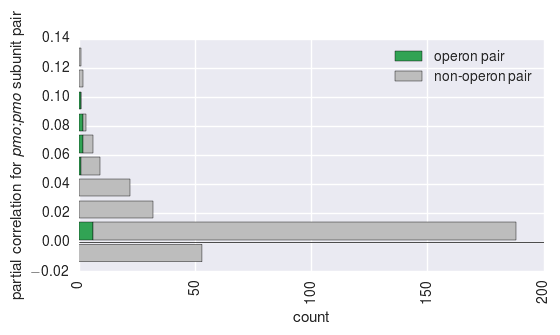

In [24]:
# now do same plot w/ landscape orientation. 
fig = plot_histograms_by_edge_category.plot_linked_and_unlinked(
    linked, unlinked, orientation='horizontal', bin_label = bin_label)

fname = os.path.join(plot_dir, 
    '170425_pmo_subunit_pairs_have_higher_pcor--GeneNet--{:.0e}_edges--landscape.pdf'.format(NUM_EDGES))
print(fname)
fig.savefig(fname, bbox_inches='tight')
fname = os.path.join(plot_dir, 
    '170425_pmo_subunit_pairs_have_higher_pcor--GeneNet--{:.0e}_edges--landscape.png'.format(NUM_EDGES))
print(fname)
fig.savefig(fname, bbox_inches='tight')

In [25]:
h6p_edges = plot_histograms_by_edge_category.get_h6p_edges(edges)

num_h6p_edges = h6p_edges.shape[0]
print('number of h6p:h6p edges: {}'.format(num_h6p_edges))
h6p_edges.head(2)

number of edges selected: 22
number of h6p:h6p edges: 22


,node2_locus,node1_locus,node2,node1,pcor,pval,qval,prob,log.spvar,pval.dir,qval.dir,prob.dir,directions,product_1,product_2
292,1_09472,1_09471,68,67,0.003498,2.220446e-16,2.705115e-15,1.0,0.003904,0.774003,0.765310,2.475797e-14,undirected,3-hexulose-6-phosphate isomerase,3-hexulose-6-phosphate synthase
11261,1_148470,1_148469,402,401,0.014269,2.220446e-16,2.705115e-15,1.0,-0.001515,0.911247,0.793353,2.475797e-14,undirected,3-hexulose-6-phosphate synthase,3-hexulose-6-phosphate isomerase


1_09471 1_09472 0.0034975091479452
    3-hexulose-6-phosphate isomerase | 3-hexulose-6-phosphate synthase
1_148469 1_148470 0.0142691876583992
    3-hexulose-6-phosphate synthase | 3-hexulose-6-phosphate isomerase
2_159112 2_159113 0.00921491370888421
    3-hexulose-6-phosphate isomerase | 3-hexulose-6-phosphate synthase
4_43633 4_43634 0.00338204945501927
    3-hexulose-6-phosphate isomerase | 3-hexulose-6-phosphate synthase
[0.0034975091479452, 0.0142691876583992, 0.00921491370888421, 0.00338204945501927] [0.00285141074635525, -0.00217726711101728, 0.0020927028968213603, 0.0033845399371111103, 0.00538004305809047, 0.0035738129329936897, -0.00178143346642862, 0.00458867819150203, 0.00944812917183117, 0.0018522881130613, -0.00193015947466849, 0.007132309012491529, -0.00202442384561047, 0.0096526444448493, 0.0107709335827339, 0.00260626390867977, 0.0077204725289199095, 0.00737439778130372]
-0.00217726711101728 0.0142691876583992
lower: -0.002, upper: 0.014
bin edges: [-0.002  0.     0.0

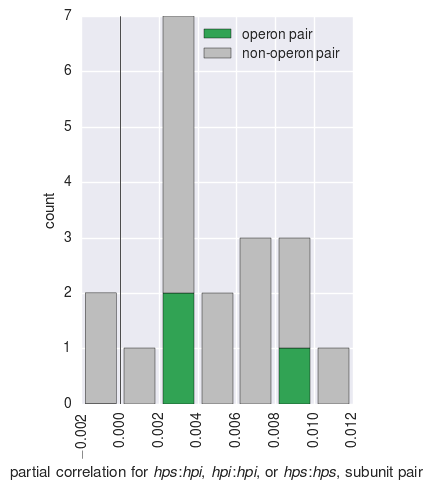

In [26]:
linked_h6p, unlinked_h6p = plot_histograms_by_edge_category.separate_out_linked_and_not_linked_rows(h6p_edges, 1)
print(linked_h6p, unlinked_h6p)

bin_label = r'partial correlation for \textit{hps}:\textit{hpi}, \textit{hpi}:\textit{hpi}, or \textit{hps}:\textit{hps},  subunit pair'
fig = plot_histograms_by_edge_category.plot_linked_and_unlinked(
    linked_h6p, unlinked_h6p, bin_label = bin_label, bin_width = 0.002)

fname = os.path.join(plot_dir, 
            'hps-hpi_sequential_pairs_have_higher_pcor' \
        '--GeneNet--gray_includes_hps-hps_too--{:.0e}_genes.pdf'.format(NUM_EDGES))
print(fname)
fig.savefig(fname, bbox_inches='tight')

In [27]:
# delete the same-same edges. 
h6p_edges = plot_histograms_by_edge_category.get_h6p_edges(edges)
print(h6p_edges.shape)
#plot_histograms_by_edge_category.filter_out_edges_with_same_node(
#    h6p_edges, ['synthase', 'isomerase'])
plot_histograms_by_edge_category.filter_out_same_same_edges(h6p_edges)
print(h6p_edges.shape)
h6p_edges

number of edges selected: 22
(22, 15)
drop row with products "3-hexulose-6-phosphate synthase":"3-hexulose-6-phosphate synthase"
drop row with products "3-hexulose-6-phosphate synthase":"3-hexulose-6-phosphate synthase"
drop row with products "3-hexulose-6-phosphate synthase":"3-hexulose-6-phosphate synthase"
drop row with products "3-hexulose-6-phosphate synthase":"3-hexulose-6-phosphate synthase"


/work/rnaseq/pcor_new/plot_histograms_by_edge_category.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  edge_df.drop(index, inplace=True)


drop row with products "3-hexulose-6-phosphate synthase":"3-hexulose-6-phosphate synthase"
drop row with products "3-hexulose-6-phosphate synthase":"3-hexulose-6-phosphate synthase"
drop row with products "3-hexulose-6-phosphate synthase":"3-hexulose-6-phosphate synthase"
drop row with products "3-hexulose-6-phosphate synthase":"3-hexulose-6-phosphate synthase"
drop row with products "3-hexulose-6-phosphate synthase":"3-hexulose-6-phosphate synthase"
drop row with products "3-hexulose-6-phosphate synthase":"3-hexulose-6-phosphate synthase"
drop row with products "3-hexulose-6-phosphate synthase":"3-hexulose-6-phosphate synthase"
drop row with products "3-hexulose-6-phosphate synthase":"3-hexulose-6-phosphate synthase"
drop row with products "3-hexulose-6-phosphate synthase":"3-hexulose-6-phosphate synthase"
drop row with products "3-hexulose-6-phosphate synthase":"3-hexulose-6-phosphate synthase"
drop row with products "3-hexulose-6-phosphate synthase":"3-hexulose-6-phosphate synthase"

,node2_locus,node1_locus,node2,node1,pcor,pval,qval,prob,log.spvar,pval.dir,qval.dir,prob.dir,directions,product_1,product_2
292,1_09472,1_09471,68,67,0.003498,2.220446e-16,2.705115e-15,1.000000,0.003904,0.774003,0.765310,2.475797e-14,undirected,3-hexulose-6-phosphate isomerase,3-hexulose-6-phosphate synthase
11261,1_148470,1_148469,402,401,0.014269,2.220446e-16,2.705115e-15,1.000000,-0.001515,0.911247,0.793353,2.475797e-14,undirected,3-hexulose-6-phosphate synthase,3-hexulose-6-phosphate isomerase
56070,1_51696,1_09471,934,67,0.002851,1.074696e-13,1.145149e-12,1.000000,-0.023091,0.089409,0.273619,2.475797e-14,undirected,3-hexulose-6-phosphate isomerase,3-hexulose-6-phosphate synthase
177050,2_159113,2_159112,1647,1646,0.009215,2.220446e-16,2.705115e-15,1.000000,0.004700,0.729561,0.754523,2.475797e-14,undirected,3-hexulose-6-phosphate isomerase,3-hexulose-6-phosphate synthase
597372,4_104554,1_09471,2979,67,-0.002177,1.392868e-08,1.052955e-07,0.999997,-0.005320,0.695528,0.745568,2.475797e-14,undirected,3-hexulose-6-phosphate isomerase,3-hexulose-6-phosphate synthase
730109,4_43634,4_43633,3272,3271,0.003382,2.220446e-16,2.705115e-15,1.000000,-0.000352,0.979351,0.804920,2.475797e-14,undirected,3-hexulose-6-phosphate isomerase,3-hexulose-6-phosphate synthase


1_09471 1_09472 0.0034975091479452
    3-hexulose-6-phosphate isomerase | 3-hexulose-6-phosphate synthase
1_148469 1_148470 0.0142691876583992
    3-hexulose-6-phosphate synthase | 3-hexulose-6-phosphate isomerase
2_159112 2_159113 0.00921491370888421
    3-hexulose-6-phosphate isomerase | 3-hexulose-6-phosphate synthase
4_43633 4_43634 0.00338204945501927
    3-hexulose-6-phosphate isomerase | 3-hexulose-6-phosphate synthase
[0.0034975091479452, 0.0142691876583992, 0.00921491370888421, 0.00338204945501927] [0.00285141074635525, -0.00217726711101728]
-0.00217726711101728 0.0142691876583992
lower: -0.002, upper: 0.014
bin edges: [-0.002  0.     0.002  0.004  0.006  0.008  0.01   0.012]
170425_explore_cutoff_0.01/hps-hpi_sequential_pairs_have_higher_pcor--GeneNet--1e+06_genes.pdf


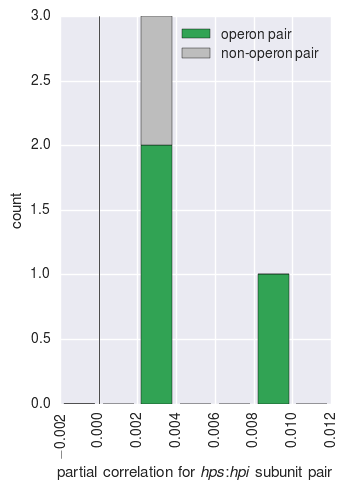

In [28]:
linked_hps_hpi, unlinked_hps_hpi = \
    plot_histograms_by_edge_category.separate_out_linked_and_not_linked_rows(
        h6p_edges, 1)
print(linked_hps_hpi, unlinked_hps_hpi)

bin_label = r'partial correlation for \textit{hps}:\textit{hpi} subunit pair'
fig = plot_histograms_by_edge_category.plot_linked_and_unlinked(
    linked_hps_hpi, unlinked_hps_hpi, bin_label = bin_label, bin_width = 0.002)

fname = os.path.join(plot_dir, 
            'hps-hpi_sequential_pairs_have_higher_pcor' \
        '--GeneNet--{:.0e}_genes.pdf'.format(NUM_EDGES))
print(fname)
fig.savefig(fname, bbox_inches='tight')

In [29]:
mdh_edges = plot_histograms_by_edge_category.get_mdh_subunit_edges(edges)

num_mdh_edges = mmo_edges.shape[0]
print('number of mdh:mdh edges: {}'.format(num_mdh_edges))
mdh_edges.head(2)

number of edges selected: 389
number of mdh:mdh edges: 324


,node2_locus,node1_locus,node2,node1,pcor,pval,qval,prob,log.spvar,pval.dir,qval.dir,prob.dir,directions,product_1,product_2
8778,1_141225,1_12750,357,255,-0.001908,6.595089e-07,4.279326e-06,0.999902,-0.016233,0.232451,0.494781,2.475797e-14,undirected,Methanol dehydrogenase [cytochrome c] subunit 1,Methanol dehydrogenase [cytochrome c] subunit ...
14639,1_158680,1_141225,462,357,-0.006949,2.220446e-16,2.705115e-15,1.000000,0.016010,0.238915,0.501637,2.475797e-14,undirected,Methanol dehydrogenase [cytochrome c] subunit ...,Methanol dehydrogenase [cytochrome c] subunit 1


4_131430 4_131433 0.0230541695874243
    Methanol dehydrogenase [cytochrome c] subunit 1 | Methanol dehydrogenase [cytochrome c] subunit 2 precursor
5_111574 5_111577 0.0598244876159993
    Methanol dehydrogenase [cytochrome c] subunit 1 | Methanol dehydrogenase [cytochrome c] subunit 2 precursor
5_58350 5_58353 0.0421328222635144
    Methanol dehydrogenase [cytochrome c] subunit 2 precursor | Methanol dehydrogenase [cytochrome c] subunit 1
-0.0184330038381085 0.0598244876159993
lower: -0.02, upper: 0.06
bin edges: [-0.02 -0.01  0.    0.01  0.02  0.03  0.04  0.05]
170425_explore_cutoff_0.01/mdh-mdh_sequential_pairs--GeneNet--1e+06_genes.pdf


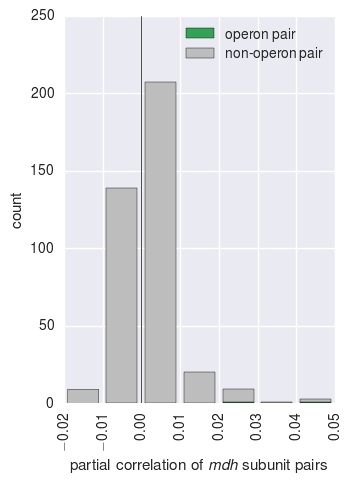

In [30]:
linked_mdh, unlinked_mdh = \
    plot_histograms_by_edge_category.separate_out_linked_and_not_linked_rows(
        mdh_edges, 3)
    
p = plot_histograms_by_edge_category.plot_linked_and_unlinked(
        linked_mdh, unlinked_mdh, orientation='vertical',
        bin_label=r'partial correlation of \textit{mdh} subunit pairs', 
        bin_width=0.01 )

fname = os.path.join(plot_dir, 
            'mdh-mdh_sequential_pairs--GeneNet--{:.0e}_genes.pdf'.format(NUM_EDGES))
print(fname)
fig.savefig(fname, bbox_inches='tight')

-0.0184330038381085 0.0598244876159993
lower: -0.02, upper: 0.06
bin edges: [-0.02 -0.01  0.    0.01  0.02  0.03  0.04  0.05]
170425_explore_cutoff_0.01/mdh-mdh_sequential_pairs--GeneNet--1e+06_genes--landscape.pdf


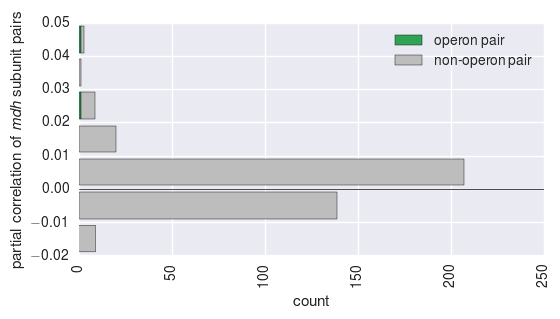

In [31]:
p = plot_histograms_by_edge_category.plot_linked_and_unlinked(
        linked_mdh, unlinked_mdh, orientation='horizontal',
        bin_label=r'partial correlation of \textit{mdh} subunit pairs', 
        bin_width=0.01 )

fname = os.path.join(plot_dir, 
            'mdh-mdh_sequential_pairs--GeneNet--{:.0e}_genes--landscape.pdf'.format(NUM_EDGES))
print(fname)
fig.savefig(fname, bbox_inches='tight')

## Look whether same-contig genes have a different distribution of pcor values.

In [32]:
genes = plot_histograms_by_edge_category.get_genes_contigs()
genes.head()

,contig,ID,product,bp,locus
0,k141_168,contigs_longer_than_1500bp_group_1_00001,hypothetical protein,669,1_00001
1,k141_175,contigs_longer_than_1500bp_group_1_00002,hypothetical protein,1521,1_00002
2,k141_185,contigs_longer_than_1500bp_group_1_00003,hypothetical protein,531,1_00003
3,k141_185,contigs_longer_than_1500bp_group_1_00004,hypothetical protein,309,1_00004
4,k141_205,contigs_longer_than_1500bp_group_1_00005,hypothetical protein,420,1_00005


In [33]:
genes[['contig', 'locus']].head()

,contig,locus
0,k141_168,1_00001
1,k141_175,1_00002
2,k141_185,1_00003
3,k141_185,1_00004
4,k141_205,1_00005


In [34]:
edges.head(2)

,node2_locus,node1_locus,node2,node1,pcor,pval,qval,prob,log.spvar,pval.dir,qval.dir,prob.dir,directions,product_1,product_2
1,1_00451,1_00266,2,1,0.002622,8.347989e-12,7.958762e-11,1.0,0.007486,0.581858,0.710264,2.475797e-14,undirected,Vitamin B12 transporter BtuB,DNA-directed RNA polymerase subunit beta'
2,1_00466,1_00266,3,1,-0.003618,2.220446e-16,2.705115e-15,1.0,0.002628,0.846709,0.781050,2.475797e-14,undirected,Vitamin B12 transporter BtuB,Iron deficiency-induced protein A precursor


In [35]:
edges.shape

(1000000, 15)

In [36]:
edges = plot_histograms_by_edge_category.merge_contig_info_onto_edge_df(edges)
edges.head(3)

,node2_locus,node1_locus,node2,node1,pcor,pval,qval,prob,log.spvar,pval.dir,qval.dir,prob.dir,directions,product_1,product_2,node1_contig,node2_contig,same contig
0,1_00451,1_00266,2,1,0.002622,8.347989e-12,7.958762e-11,1.0,0.007486,0.581858,0.710264,2.475797e-14,undirected,Vitamin B12 transporter BtuB,DNA-directed RNA polymerase subunit beta',k141_1334,k141_1849,False
1,1_00466,1_00266,3,1,-0.003618,2.220446e-16,2.705115e-15,1.0,0.002628,0.846709,0.781050,2.475797e-14,undirected,Vitamin B12 transporter BtuB,Iron deficiency-induced protein A precursor,k141_1334,k141_1885,False
2,1_00499,1_00266,4,1,0.003241,2.220446e-16,2.705115e-15,1.0,0.006386,0.638542,0.729015,2.475797e-14,undirected,Vitamin B12 transporter BtuB,L-2%2C4-diaminobutyrate decarboxylase,k141_1334,k141_2060,False


In [37]:
edges[edges['same contig'] == True].shape

(2724, 18)

In [38]:
edges[edges['same contig'] == False].shape

(997276, 18)

In [39]:
edges.shape

(1000000, 18)

(array([  1.40402112e-02,   1.70488278e-02,   1.85531362e-02,
          2.55732418e-02,   2.75789862e-02,   5.96708975e-02,
          5.81665891e-02,   9.22642448e-02,   1.24857592e-01,
          1.77508384e-01,   2.96850179e-01,   4.19200590e-01,
          6.56379872e-01,   1.11368961e+00,   1.98167552e+00,
          3.96836540e+00,   8.83079139e+00,   2.45678624e+01,
          9.51946374e+01,   3.76563478e+01,   5.09990613e+01,
          1.55762604e+02,   5.50316105e+01,   2.73969649e+01,
          1.31135572e+01,   7.78429422e+00,   4.53799682e+00,
          2.66563438e+00,   1.66025497e+00,   1.13675567e+00,
          8.53945700e-01,   7.09030664e-01,   4.85891594e-01,
          3.73068468e-01,   3.20417676e-01,   2.62752523e-01,
          1.96562956e-01,   1.78511256e-01,   1.53940887e-01,
          1.50430834e-01,   1.15831742e-01,   9.77800420e-02,
          9.32671170e-02,   8.47427031e-02,   6.91981836e-02,
          6.56881308e-02,   5.46565363e-02,   4.26220696e-02,
        

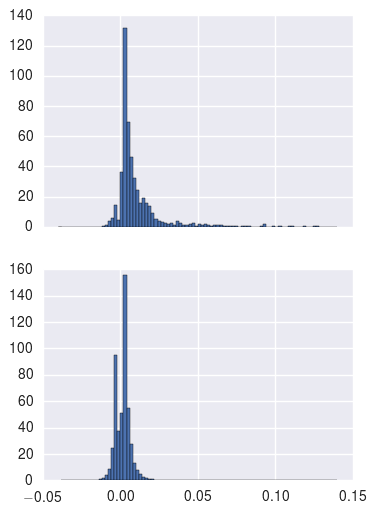

In [40]:
fig, axs = plt.subplots(2, 1, figsize=(4, 6), 
                        sharey=False, sharex=True)
same_contig_pcors = edges[edges['same contig']] 

bins = np.arange(-0.04, 0.14, 0.002)

same = edges[edges['same contig'] == True]
not_same = edges[edges['same contig'] == False]
axs[0].hist(same['pcor'], bins, normed=True)
axs[1].hist(not_same['pcor'], bins, normed=True)

same.shape: (2724, 18)
not_same.shape: (997276, 18)
170425_explore_cutoff_0.01/same-contig_and_cross-contig_pcor_distributions.pdf


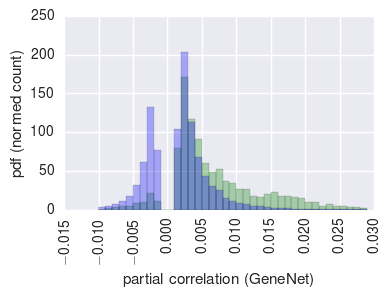

In [41]:
fig = plot_histograms_by_edge_category.plot_pdf_of_same_and_different_contig_pcors(edges)

fname = os.path.join(plot_dir, 
            'same-contig_and_cross-contig_pcor_distributions.pdf'.format(NUM_EDGES))
print(fname)
fig.savefig(fname, bbox_inches='tight')

In [42]:
assert False
# I never got cytoscape to load anything useful.  I'm not saying it can't be done though!

AssertionError: 

## Write for load into cytoscape

In [ ]:
EDGE_FILE

In [ ]:
os.path.split(EDGE_FILE)

In [ ]:
os.path.split(EDGE_DIR)
save_dir = os.path.join(os.path.split(EDGE_DIR)[1], 'save_as_gml')
print(save_dir)
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

In [ ]:
sys.path.append('/work/rnaseq/pcor_new/networkx')
import networkx_helpers as nxh
import networkx_explore as nxe

In [ ]:
network = nxh.build_network(EDGE_FILE)

In [ ]:
import networkx as nx

In [ ]:
plot_dir

In [ ]:
gml_file = os.path.join(save_dir, 'graph.gml')
print(gml_file)
nx.write_gml(network, gml_file)

In [ ]:
! realpath $gml_file

In [ ]:
! ls -lht $gml_file

In [ ]:
! pwd

In [ ]:
! ls /work/rnaseq/pcor_new/GeneNet/170412_explore_cutoff_0.01 #/save_as_gml/graph.gml

In [ ]:
# make a sub-network without hypothetical proteins since the 1M edge file is big for cytoscape. 

In [ ]:
product_dict = nx.get_node_attributes(network, 'product')
non_hypothetical_nodes = []
for n in network.nodes_iter():
    if product_dict[n] != 'hypohetical protein':
        non_hypothetical_nodes.append(n)
        print(n, product_dict[n])
        
network_no_hypothetical = network.subgraph(non_hypothetical_nodes)

In [ ]:
network_no_hypothetical.number_of_nodes()

In [ ]:
gml_file = os.path.join(save_dir, 'graph_without_hypothetical_proteins.gml')
print(gml_file)
nx.write_gml(network_no_hypothetical, gml_file)